<a href="https://colab.research.google.com/github/trankhanhduy20146093/TRI_TUE_NHAN_TAO/blob/main/Recognize_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#Khai báo các thư viện cần sử dụng
from os import listdir
from numpy import asarray
from numpy import save
from keras.utils.image_utils import img_to_array
from keras.utils import load_img

In [35]:
#Kết nối Colab với Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
folder='/content/drive/MyDrive/TRI_TUE_NHAN_TAO/CLASSROOM/'

In [37]:
photos,labels = list(),list()
output = 0.0
for file in listdir(folder):
      if file.startswith('ANH_TUAN'):
        output=0.0
      if file.startswith('BAO_CHUONG'):
        output=1.0
      if file.startswith('CHI_THANH'):
        output=2.0
      if file.startswith('DANG_HUY'):
        output=3.0
      if file.startswith('DANG_TU'):
        output=4.0
      if file.startswith('HAO_DONG'):
        output=5.0
      if file.startswith('HUU_CHI'):
        output=6.0
      if file.startswith('KHANH_DUY'):
        output=7.0
      if file.startswith('LE_PHONG'):
        output=8.0
      if file.startswith('NHAT_HUY'):
        output=9.0
      if file.startswith('PHI_THANG'):
        output=10.0
      if file.startswith('TRI'):
        output=11.0
      if file.startswith('TRONG_TRI'):
        output=12.0
      if file.startswith('VIET_CUONG'):
        output=13.0
      if file.startswith('VU_BINH'):
        output=14.0
        
      photo = load_img(folder+file,target_size=(40,30))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)

In [38]:
photos = asarray(photos)
labels = asarray(labels)
save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/photo_face.npy',photos)
save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/label_face.npy',labels)
#Kiểm tra kích thước
print("kich thuoc photos",photos.shape)
print("kich thuoc labels",labels.shape)

kich thuoc photos (950, 40, 30, 3)
kich thuoc labels (950,)


In [39]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y,  test_y = train_test_split(photos,labels, test_size=0.2, train_size=0.8)
#Kiểm tra kích thước
print("kich thuoc train_x",train_x.shape)
print("kich thuoc test_x",test_x.shape)

kich thuoc train_x (760, 40, 30, 3)
kich thuoc test_x (190, 40, 30, 3)


In [40]:
#Scale lại data
train_x = train_x.astype('float32')
train_x = train_x/255
     
test_x = test_x.astype('float32')
test_x = test_x/255

In [41]:
from keras.utils import to_categorical
train_labels = to_categorical(train_y)
test_labels = to_categorical(test_y)

In [42]:
#Kiểm tra kích thước
print("kich thuoc train_x",train_x.shape)
print("kich thuoc train_labels",train_labels.shape)

kich thuoc train_x (760, 40, 30, 3)
kich thuoc train_labels (760, 15)


In [43]:
from keras import Sequential,Model,Input
from keras.layers import Dense,Flatten,Dropout, Conv2D, MaxPooling2D,Normalization
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='linear',input_shape=(40,30,3),padding='same'))
     
from keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(64,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128,(3,3),activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2),padding='same'))

In [44]:
classes = 15

model.add(Flatten())
     
model.add(Dense(700,activation='linear'))
model.add(Dropout(0.5))
model.add(Dense(classes,activation='softmax'))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 40, 30, 32)        896       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 40, 30, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 20, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 20, 15, 64)        18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 20, 15, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 8, 64)        0         
 2D)                                                  

In [60]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics =['accuracy'])

batch_size = 64
epochs = 20

train = model.fit(train_x,train_labels,batch_size, epochs,verbose=1)
test_loss, test_acc = model.evaluate(test_x, test_labels)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

Epoch 1/20
12/12 [==============================] - 1s 8ms/step - loss: 2.3417e-06 - accuracy: 1.0000
Epoch 2/20
12/12 [==============================] - 0s 8ms/step - loss: 1.2521e-06 - accuracy: 1.0000
Epoch 3/20
12/12 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 0.9987
Epoch 4/20
12/12 [==============================] - 0s 7ms/step - loss: 5.2344e-04 - accuracy: 1.0000
Epoch 5/20
12/12 [==============================] - 0s 7ms/step - loss: 1.4543e-04 - accuracy: 1.0000
Epoch 6/20
12/12 [==============================] - 0s 7ms/step - loss: 1.2514e-05 - accuracy: 1.0000
Epoch 7/20
12/12 [==============================] - 0s 7ms/step - loss: 5.6591e-07 - accuracy: 1.0000
Epoch 8/20
12/12 [==============================] - 0s 6ms/step - loss: 6.0558e-07 - accuracy: 1.0000
Epoch 9/20
12/12 [==============================] - 0s 6ms/step - loss: 2.4035e-06 - accuracy: 1.0000
Epoch 10/20
12/12 [==============================] - 0s 7ms/step - loss: 1.0984e-06 - 

In [61]:
model.save('/content/drive/MyDrive/TRI_TUE_NHAN_TAO/recognize_face.h5')


1/1 [==============================] - 0s 19ms/step


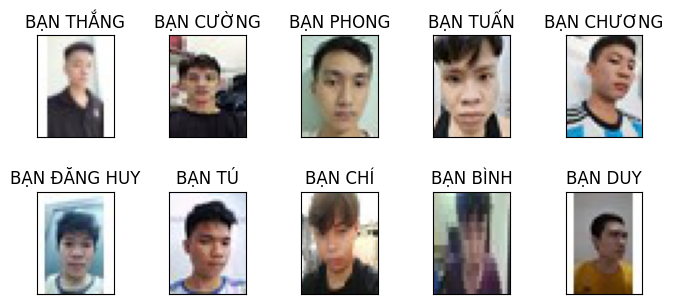

In [62]:
#test mo hinh

import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np

labels = ['BẠN TUẤN', 'BẠN CHƯƠNG','BẠN THÀNH','BẠN ĐĂNG HUY','BẠN TÚ','BẠN ĐÔNG','BẠN CHÍ','BẠN DUY','BẠN PHONG','BẠN NHẬT HUY','BẠN THẮNG','BẠN TRÍ','BẠN TRỌNG TRÍ','BẠN CƯỜNG','BẠN BÌNH']


for i in range(0 , 10):
    plt.subplot(3, 5, i+1)
    plt.tight_layout()
    img = load_img('/content/drive/My Drive/IMAGES/ANH' + str(i+1) + '.jpg', target_size=(40,30))
    plt.imshow(img)
    img = img_to_array(img)
    img = img.reshape(1, 40,30,3)
    img = img.astype('float32') / 255
    predicted_label = labels[model.predict(img).argmax()]
    plt.title("{}".format(predicted_label))
    plt.xticks([])
    plt.yticks([])
plt.show()
